# Video Analysis, Detecting Emotions 

In [26]:
import cv2    
import math   
import matplotlib.pyplot as plt   
%matplotlib inline
import pandas as pd
from keras.preprocessing import image  
import numpy as np    
from keras.utils import np_utils
#from skimage.transform import resize   # for resizing images
import tensorflow as tf
from tensorflow.keras.models import load_model

from imutils import paths
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

In [27]:
#Convert video to frames
def video_to_frames(videoFile):
    count = 0
    
    cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
    frameRate = cap.get(5) #frame rate
    x=1
    while(cap.isOpened()):
        frameId = cap.get(1) #current frame number
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % math.floor(frameRate) == 0):
            filename ="Video_Frames/frame%d.jpg" % count;count+=1
            cv2.imwrite(filename, frame)
    cap.release()

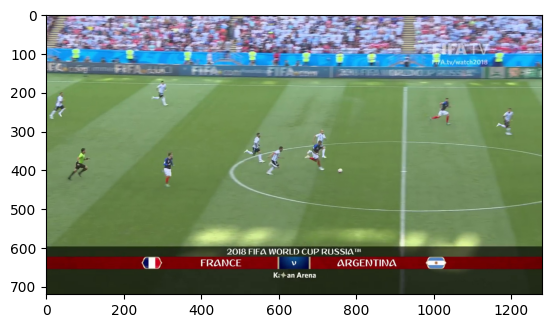

In [17]:
img = plt.imread('Video_Frames/frame1.jpg')   # reading image using its name
plt.imshow(img)

In [28]:
#  Main function to process images and classify emotions

def monitor_for_moments():


    videoFile = "GoalMoments.mp4"
    
    # Load Moments Recognizer model
    h_model = load_model('model_Moments_CNN.h5')

    # Load Class Names(Moments)
    f = open('class.names', 'r')
    class_names = [l.strip() for l in f.readlines()]
    f.close()
    
    #Video Analysis
    video_to_frames(videoFile)
    
    #Analysing Emotion from frames
    emotions = get_emotion(h_model, class_names)
    return emotions
    
    
    

In [31]:
# emotion classification from individual frames

def get_emotion(model, classNames):
    
    IMG_SIZE = 224
    CHANNELS = 3
    emotions = []
    
    imagePaths = list(paths.list_images('Video_Frames'))
    for imagePath in imagePaths:
        image = load_img(imagePath, target_size=(IMG_SIZE, IMG_SIZE))
        image = img_to_array(image)
        image = image/255
        prediction = model.predict(image.reshape(1,224,224,3)) 
        classID = np.argmax(prediction) #find classID
        emotion_name = classNames[classID] #find facial expression
        emotions.append(emotion_name)
        # print(emotion_name)
    return emotions
    

In [56]:
# computes maximum happy period and find the time frame of the video

def report_happy_moment(emotion_list):
    frame_length = len(emotions)
    coded_list = [1 if i=="Happy" else 0 for i in emotions]
    max_happy_regions = [sum(coded_list[i:i+10]) for i in range(frame_length)]
    happy_moment_frame_index = np.argmax(max_happy_regions)
    frame_rate = 5
    happy_moment_mid_point = happy_moment_frame_index/frame_rate
    happy_moment_period = [happy_moment_mid_point-5, happy_moment_mid_point+10]
    return happy_moment_period
    

In [32]:
# Main function capturing emotions

emotions = monitor_for_moments()


1/1 [==============================] - 2s 2s/step
Happy
1/1 [==============================] - 0s 122ms/step
Happy
1/1 [==============================] - 0s 130ms/step
Happy
1/1 [==============================] - 0s 119ms/step
Happy
1/1 [==============================] - 0s 122ms/step
Happy
1/1 [==============================] - 0s 120ms/step
Loss
1/1 [==============================] - 0s 121ms/step
Loss
1/1 [==============================] - 0s 121ms/step
Loss
1/1 [==============================] - 0s 121ms/step
Loss
1/1 [==============================] - 0s 120ms/step
Loss
1/1 [==============================] - 0s 121ms/step
Loss
1/1 [==============================] - 0s 121ms/step
Happy
1/1 [==============================] - 0s 121ms/step
Loss
1/1 [==============================] - 0s 119ms/step
Happy
1/1 [==============================] - 0s 135ms/step
Loss
1/1 [==============================] - 0s 119ms/step
Happy
1/1 [==============================] - 0s 124ms/step
Happy
1/1 [===

## Final Output After Analysis:

In [58]:
report_happy_moment(emotions)

[20.6, 35.6]